<a href="https://colab.research.google.com/github/MonitSharma/Quantum-Computing-with-Qiskit-and-IBMQ/blob/main/Atoms_of_Computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atoms of Computation


You can program a quantum computer from the comfort of your home. But to understand quantum computing and how it works, we have to begin with how classical computers work,  Let's see this in brief:


In [3]:
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## Unit of Information: Bits

Welcome to the fascinating world of information! 🌟 In this section, we'll delve into the fundamental unit of information: bits. 🧐

🤔 But what exactly is a bit? 🤔

Imagine a world where everything is reduced to its simplest form—a world of zeros and ones. That's precisely what a bit represents: the building block of digital information. 🧱

✨ The term "bit" is a contraction of "binary digit," and it carries an incredible power to store and transmit information. It's like the atom of the digital realm, the tiniest speck that can hold a universe of meaning. 🌌

To put it simply, a bit can have one of two values: 0 or 1. It's the ultimate yes-or-no, true-or-false, on-or-off switch. But don't be fooled by its seemingly limited range! 🎯

Bits come together like puzzle pieces to form larger units of information. Eight bits make up a byte, which can represent a single character of text or a small number. With every additional bit, the possibilities expand exponentially. 💥

In the vast landscape of digital communication and computation, bits are the currency of exchange. They flow through the circuits of our devices, bringing life to our screens and enabling the marvels of modern technology. 🌐💻

We are used to represent numbers through a string of $0$ to $9$. In the string of digits, each digit represents how many times the number contains a certain power of ten. For example $9213$ means:

$$ 9000 + 200 + 10 + 3 $$

or we can write it as

$$ 9213 = ( 1 \times 2^{13}) +  (0 \times 2^{12}) + (0 \times 2^{11}) + ( 0 \times 2^{10}) \\ + (1 \times 2^{9}) + (1 \times 2^{8}) + ( 1 \times 2^{7}) +  (1 \times 2^{6}) \\
+  ( 1 \times 2^{5}) +  (1 \times 2^{4}) + ( 1 \times 2^{3}) +   (1 \times 2^{2}) \\ +  (0 \times 2^{1}) +  ( 1 \times 2^{0}) $$


Hence in binary it can be written as $10001111111101$

In [4]:
def decimal_to_binary(decimal):
    binary = ""
    if decimal == 0:
        return "0"
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal //= 2
    return binary

# Example usage
decimal_number = 42
binary_number = decimal_to_binary(decimal_number)
print(f"The binary representation of {decimal_number} is: {binary_number}")


The binary representation of 42 is: 101010


In [5]:
def binary_to_decimal(binary):
    decimal = 0
    power = len(binary) - 1
    for digit in binary:
        decimal += int(digit) * (2 ** power)
        power -= 1
    return decimal

# Example usage
binary_number = "101010"
decimal_number = binary_to_decimal(binary_number)
print(f"The decimal representation of {binary_number} is: {decimal_number}")


The decimal representation of 101010 is: 42


## Computation as Diagram

Whether we are using bits or qubits, we need to manipulate then in order to turn the inputs we have into outputs we need. We will demonstrate with circuit diagrams, with the inputs on the left and the output on the right. These operations are called **gates**. Here's an example of what a circuit looks like:



![](https://learn.qiskit.org/content/v2/ch-states/images/classical_circuit.png)
You aren't expected to know what this does.




---

For a quantum computer, we use the same idea and make a quantum circuit:



![](https://learn.qiskit.org/content/v2/ch-states/images/quantum_circuit.png)




**Now let's make a quantum circuit of our own**


Don't get worried about what these gates are, and what they are doing, we will see that shortly in detail.







## First Quantum Circuit

In making a quantum circuit, we need to do three jobs.
1. Encode the input
2. Do some computation
3. Extract the result

![](https://learn.qiskit.org/content/v2/ch-states/images/half-adder.svg)

Let's start by creating a quantum circuit

In [6]:
qcirc = QuantumCircuit(8)

So, we created a quantum circuit by the name `qcirc` and using the `QuantumCircuit` function of Python. This function takes in the number of **qubits** we need for the quantum circuit.



To extract the output, we need to do a measurement, hence use the `measure_all` function of qiskit. It measures all the qubits and give specific output bit

In [7]:
qcirc.measure_all()

We can also visualize how our quantum circuit looks like by using the `draw` function of qiskit.

In [8]:
qcirc.draw()

░ ┌─┐                     
   q_0: ─░─┤M├─────────────────────
         ░ └╥┘┌─┐                  
   q_1: ─░──╫─┤M├──────────────────
         ░  ║ └╥┘┌─┐               
   q_2: ─░──╫──╫─┤M├───────────────
         ░  ║  ║ └╥┘┌─┐            
   q_3: ─░──╫──╫──╫─┤M├────────────
         ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ─░──╫──╫──╫──╫─┤M├─────────
         ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ─░──╫──╫──╫──╫──╫─┤M├──────
         ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ─░──╫──╫──╫──╫──╫──╫─┤M├───
         ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ─░──╫──╫──╫──╫──╫──╫──╫─┤M├
         ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/════╩══╩══╩══╩══╩══╩══╩══╩═
            0  1  2  3  4  5  6  7

These are bit bland, not that colorful. To make quantum circuits more colorful, you need to install `pylatexenc` library

Simply run
```python
%pip install pylatexenc
```

and then run the below code:

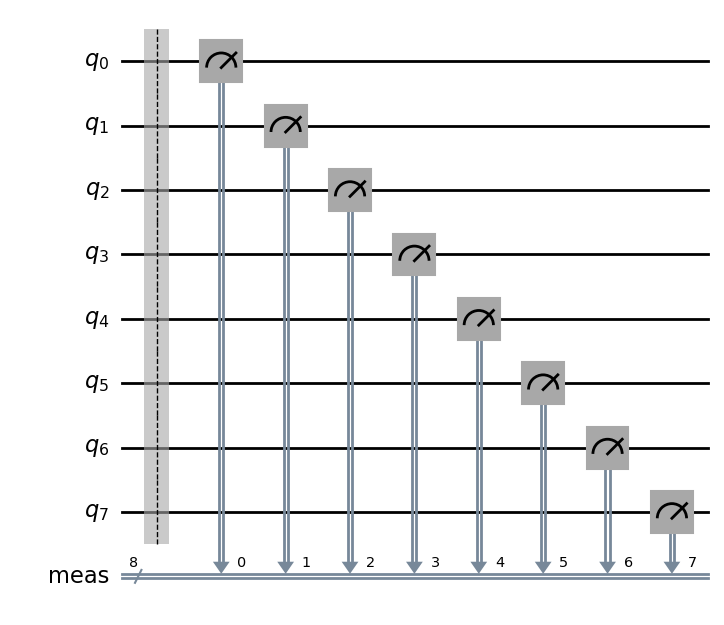

In [9]:
qcirc.draw('mpl')

Now the circuit is more colorful

We started with $8$ qubits, which are represented here via $q_0, q_1,...q_7$, they all were initialised in $0$ state, and we didn't applied any gate in between and then measured directly. So our output will be $00000000$ , one zero for each qubit.

Let's see how to run the circuit.
(we'll learn about all the simulators and backends later)

In [10]:
from qiskit.primitives import Sampler, Estimator, BackendEstimator, BackendSampler

In [11]:
backend = AerSimulator()  # decide the backend on which to run the circuit

sampler = BackendSampler(backend)  # create a sampler object
sampler2 = Sampler()

result = sampler.run(qcirc).result()          # run the circuit and save the results

result

SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 1024}])

You see the result. It's very complicated and detailed, about the `job_id` and every detail the circuit. But we don't need much, we only need to see the measurement. So we use:

In [13]:
print("Counts",result.quasi_dists[0])

Counts {0: 1.0}


This shows how many times a certain shot was measured, and we can see that we measured $00000000$ 100% of the times. The $1024$ at the end tells the number of shots or number of times the circuit was executed. The reason for running many times and showing the result as a histogram is because quantum computers may have some randomness in their results. In this case, since we aren’t doing anything quantum, we get just the 0 result with certainty.



 Let's plot this

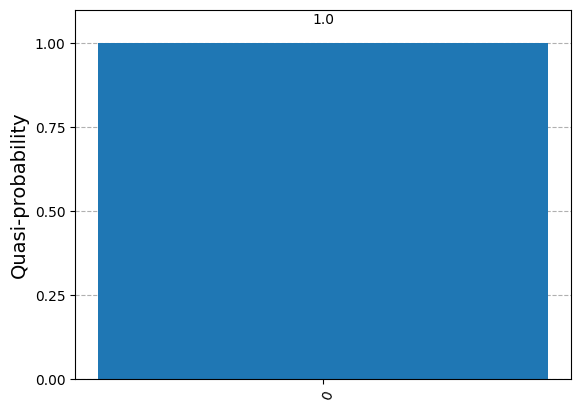

In [14]:
plot_histogram(result.quasi_dists[0])

### What is a qubit?

Let's look at it from the Linear Algebra point of view. Since we are also working with mathematical representations.


We'll again start by creating a quantum circuit.

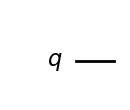

In [15]:
qcirc = QuantumCircuit(1)  # only a single qubit quantum circuit
qcirc.draw('mpl')          # let's visualize the circuit

The state $|0⟩$ is a vector $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and the state $|1\rangle$ is also a vector, represented by $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$


Let's initialize this as a state

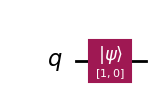

In [16]:
qcirc.initialize([1,0])
qcirc.draw('mpl')

by this `QuantumCircuit.initialize` function, you can initialize your quantum state in any vector you want.

This is just qubit initialized in $|0⟩$ state.


Let's measure the state, we would be getting the result `0` 100% of time.

In [17]:
qcirc.measure_all()         # applying the measurement

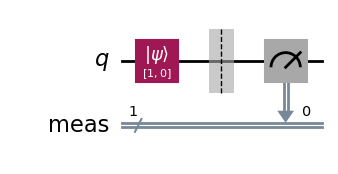

In [18]:
qcirc.draw('mpl')

In [19]:
result = sampler.run(qcirc).result()
counts = result.quasi_dists[0]
counts

{0: 1.0}

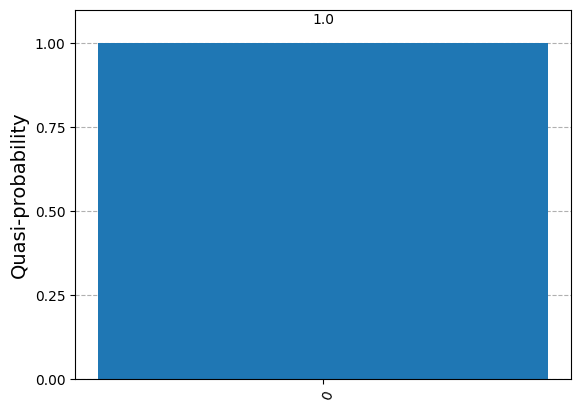

In [20]:
plot_histogram(counts)

We can also change the number of shots.

In [21]:
result = sampler.run(qcirc, shots = 2000).result()
counts = result.quasi_dists[0]
counts

{0: 1.0}

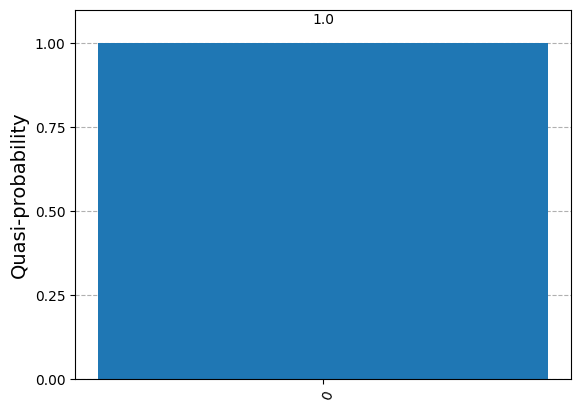

In [22]:
plot_histogram(counts)

Another way of creating the quantum circuit is presented below. In it, we create quantum registers (qubits), classical registers (bits) and the results from the qubit measurement are stored in the classical register (the bit).

In [23]:
from qiskit import QuantumRegister, ClassicalRegister

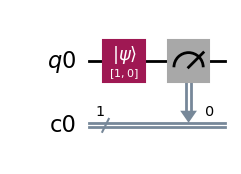

In [24]:
qr = QuantumRegister(1,'q0')            # you can specifically name the qubit q0
cr = ClassicalRegister(1,'c0')
qc = QuantumCircuit(qr, cr)             # combine the quantum and classical register
qc.initialize([1,0],0)
qc.measure(0,0)                         # apply the measurement as operator
qc.draw('mpl')

Run the cirucit on simulator

In [25]:
result = sampler.run(qc, shots = 2000).result()
counts = result.quasi_dists[0]
counts

{0: 1.0}

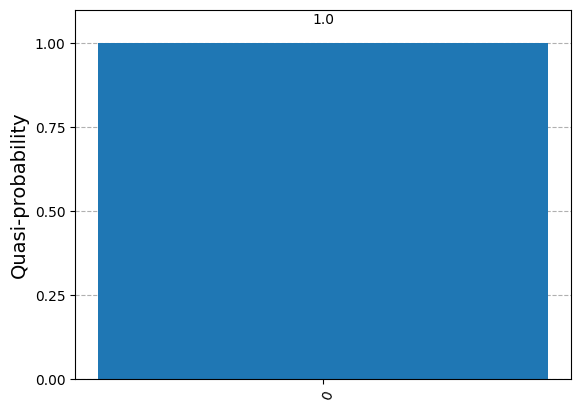

In [26]:
plot_histogram(counts)

**Congratulations** you just ran your first quantum circuit. In the next lecture we will learn about quantum operations or Basic gates.